# Linear regression


#### 1. Load the provided .npy files. You can load it with numpy.
 - each file contains one vector, X and y
 - visualize X vs y on a scatter plot
 - fit an $y = w_0 + w_1\cdot X + w_2 \cdot X^2$ linear regression using sklearn

#### 2. Using different features
 - plot the residuals (the difference between the prediction and the actual $y$) vs the original $y$
 - a non-random-noise like pattern suggests non-linear connection between the features and the predictions
 - someone told us that the connection between X and y is $y = A \cdot X + B \cdot \cos^3(X) + C\cdot X^2 + D$
    - using sklearn's linear regression estimate $A, B, C, D$!
 - plot the residuals again! is it better now?

#### 3. Other methdods than sklearn for linear regression
 - using the statsmodels package perform the same linear regression as in 2.) (hint: use statsmodels.api.OLS)
 - is the result the same? if not guess, why? (did you not forget to add the constant term?)
 - try to get the same results with statsmodels as with sklearn!
 - using the analytic solution formula shown during the lecture, calculate the coefficients (A, B, C, D). are they the same compared to the two previous methods?

#### 4. 
 - load the real_estate.csv to a pandas dataframe
 - drop the ID column and the geographic location columns
 - fit a linear regression model to predict the unit price using sklearn

#### 5. 
 - interpret the coefficients and their meaning shortly with your own words
 - plot the residuals for the predictions. if you had to decide only on this information, which house would you buy?


### Hints:
 - On total you can get 10 points for fully completing all tasks.
 - Decorate your notebook with, questions, explanation etc, make it self contained and understandable!
 - Comments you code when necessary
 - Write functions for repetitive tasks!
 - Use the pandas package for data loading and handling
 - Use matplotlib and seaborn for plotting or bokeh and plotly for interactive investigation
 - Use the scikit learn package for almost everything
 - Use for loops only if it is really necessary!
 - Code sharing is not allowed between student! Sharing code will result in zero points.
 - If you use code found on web, it is OK, but, make its source clear! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 1) Fitting polynomial

In [2]:
x = np.load("X.npy")
y = np.load("y.npy")
x.shape, y.shape, np.isnan(x).sum(), np.isnan(y).sum()

((1000,), (1000,), 0, 0)

<b>The arrays have the same shape, and there are no missing/NaN values.

In [3]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit([[x,x**2] for x in x],y)
# The data is in a form where the two features are the data x itself and its x^2 square.

x_sample = np.linspace(min(x),max(x),1000)
#Sampling x, so that the plotting is smooth.
y_pred = linreg.predict([[x,x**2] for x in x_sample])

The coefficients are: [1.18887634 0.06469683]
The intercep is at: -47.372935633620756


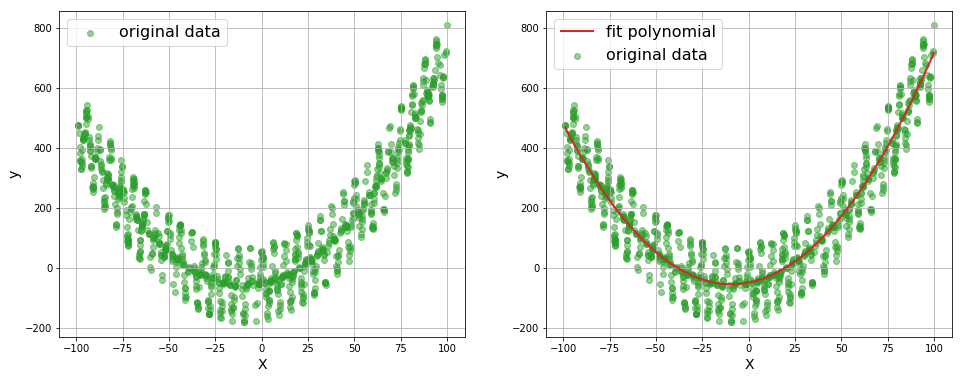

In [4]:
plt.figure(figsize=[16,6])
plt.subplot(121)
plt.scatter(x,y,label="original data",color="tab:green",alpha = 0.5)
plt.xlabel("X",size=14)
plt.ylabel("y", size = 14)
plt.grid()
plt.legend(fontsize=16)

plt.subplot(122)
plt.scatter(x,y,label="original data",color="tab:green",alpha = 0.5)
plt.xlabel("X",size=14)
plt.ylabel("y", size = 14)
plt.plot(x_sample,y_pred,color="tab:red",lw=2,label="fit polynomial")
plt.grid()
plt.legend(fontsize=16)

print("The coefficients are:", linreg.coef_)
print("The intercep is at:", linreg.intercept_)

# 2) Different features
 - plot the residuals (the difference between the prediction and the actual $y$) vs the original $y$
 - a non-random-noise like pattern suggests non-linear connection between the features and the predictions
 - someone told us that the connection between X and y is $y = A \cdot X + B \cdot \cos^3(X) + C\cdot X^2 + D$
    - using sklearn's linear regression estimate $A, B, C, D$!
 - plot the residuals again! is it better now?

Text(0.5, 0, 'Original y')

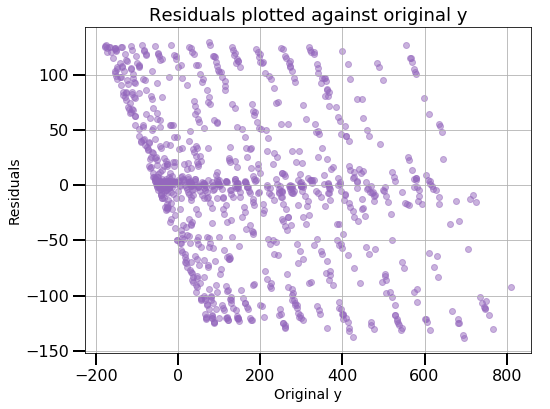

In [5]:
y_pred2 = linreg.predict([[x,x**2] for x in x])
residuals = y_pred2 - y
plt.figure(figsize= [8,6])
plt.title("Residuals plotted against original y", fontsize = 18)
plt.scatter(y,residuals,alpha = 0.5,color="tab:purple")
plt.grid()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params("both",length=12,width=2)
plt.tick_params("both",which="minor",length=8,width=2)
plt.ylabel("Residuals",size =14)
plt.xlabel("Original y",size=14)

It seems that there might be some additional of relationship between X and y other than purely polynomial. The residuals shows periodical behaviour.

The estimates are: 
A  1.1967685256358924 
B  123.56766140052726 
C  0.06569863215577243 
D  -50.07109269261798


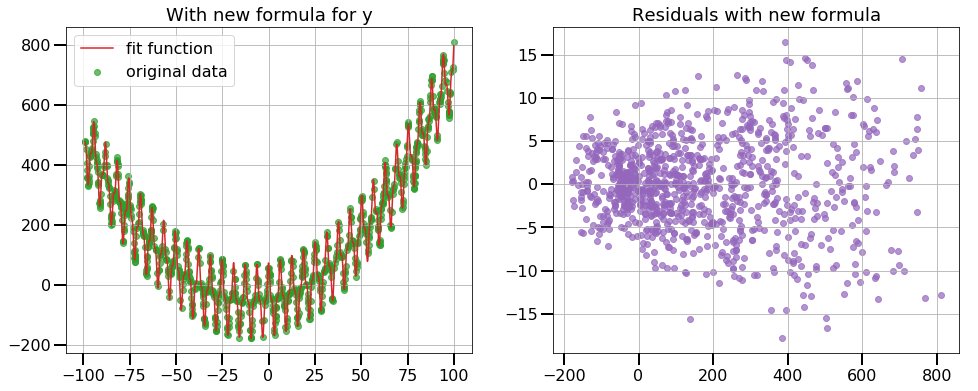

In [6]:
linreg.fit([[x,np.cos(x)**3,x**2] for x in x],y)
print("The estimates are: \nA ", linreg.coef_[0],"\nB " ,linreg.coef_[1],"\nC ",linreg.coef_[2],"\nD ",linreg.intercept_)

plt.figure(figsize=[16,6])
plt.subplot(121)
plt.title("With new formula for y",size=18)
plt.scatter(x,y,color="tab:green",alpha = 0.7,label="original data")
plt.plot(x_sample,linreg.predict([[x,np.cos(x)**3,x**2] for x in x_sample]),color="tab:red",label="fit function")
plt.grid()
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params("both",length=12,width=2)
plt.tick_params("both",which="minor",length=8,width=2)

plt.subplot(122)
plt.title("Residuals with new formula",size=18)
residuals_cos = linreg.predict([[x,np.cos(x)**3,x**2] for x in x]) - y
plt.scatter(y,residuals_cos,color="tab:purple",alpha = 0.7)
plt.grid()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params("both",length=12,width=2)
plt.tick_params("both",which="minor",length=8,width=2)

With the new formula, the fit function describes the data more meaningfully.
Now, the new residuals are more like random noise.

# 3. Other methdods than sklearn for linear regression
 - using the statsmodels package perform the same linear regression as in 2.) (hint: use statsmodels.api.OLS)
 - is the result the same? if not guess, why? (did you not forget to add the constant term?)
 - try to get the same results with statsmodels as with sklearn!
 - using the analytic solution formula shown during the lecture, calculate the coefficients (A, B, C, D). are they the same compared to the two previous methods?

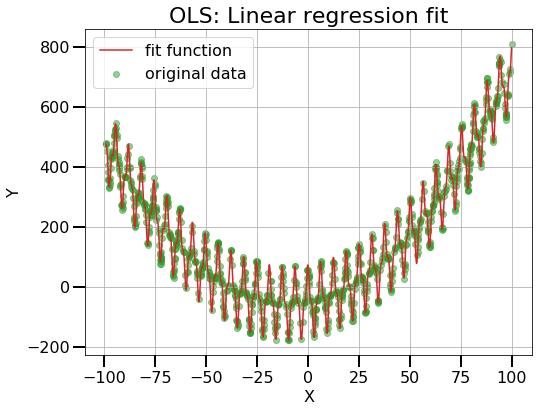

In [7]:
import statsmodels.api as sm

x_OLS = [[x,np.cos(x)**3,x**2] for x in x]
x_OLS = sm.add_constant(x_OLS)
model = sm.OLS(y,x_OLS)
res = model.fit()

results = res.params[0] + x_sample* res.params[1] + np.cos(x_sample )**3 * res.params[2] + x_sample**2 * res.params[3]


plt.figure(figsize=[8,6])
plt.scatter(x,y,color="tab:green", alpha = 0.5,label="original data")
plt.title("OLS: Linear regression fit",size=22)
plt.plot(x_sample, results, color="tab:red",label="fit function")
plt.grid()
plt.legend(fontsize=16)
plt.xlabel("X",size=16)
plt.ylabel("Y",size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params("both",length=12,width=2)
plt.tick_params("both",which="minor",length=8,width=2)


#plt.plot(x_sample,results)

In [8]:
print("The estimates are with OLS:\nA " ,res.params[1],"\nB ",res.params[2],"\nC ",res.params[3], "\nD ",
      res.params[0])

The estimates are with OLS:
A  1.1967685256358958 
B  123.56766140052561 
C  0.06569863215576484 
D  -50.07109269259321


In [9]:
x_arr = np.array([[x,np.cos(x)**3,x**2,1] for x in x])
print("Parameters calculated analytically: ")
[print(x) for x in np.dot(np.dot(np.linalg.inv(np.dot(x_arr.T,x_arr)),x_arr.T),y)]
None

Parameters calculated analytically: 
1.1967685256358966
123.56766140052628
0.06569863215576496
-50.07109269259271


From the parameter values as well as from the plots we can see, that the results are within the margin of error.

# 4. 
 - load the real_estate.csv to a pandas dataframe
 - drop the ID column and the geographic location columns
 - fit a linear regression model to predict the unit price using sklearn
 
 
# 5. 
 - interpret the coefficients and their meaning shortly with your own words
 - plot the residuals for the predictions. if you had to decide only on this information, which house would you buy?


In [10]:
data = pd.read_csv("real_estate.csv",index_col = "No")
data = data.drop(columns = ["X5 latitude", "X6 longitude"])

re_linreg = LinearRegression()

In [11]:
data.isna().sum(axis = 0)

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
Y house price of unit area                0
dtype: int64

<b>No values are missing.

### Fitting on raw data

In [12]:
x = data.drop(columns = data.columns[-1])
y = data[data.columns[-1]]
re_linreg.fit(x,y)

print("Coefficients \ntransaction date ",re_linreg.coef_[0], "\nage of the house: ", re_linreg.coef_[1],
      "\ndistance to MRT: ",re_linreg.coef_[2],"\nnumber of convenience store: ", re_linreg.coef_[3],
      "\n\nintercept: ", re_linreg.intercept_)

Coefficients 
transaction date  5.778042819974504 
age of the house:  -0.25447797308626013 
distance to MRT:  -0.00551299698054758 
number of convenience store:  1.257864100385426 

intercept:  -11588.747800122863


The negative intercept seems very suspicious. In my speculations it would mean, that there'd be a flat amount, that would be discounted if a house is sold. However, I'd disagree with such statement, due to the fact, that when real estate is bought, some additional fees  (eg.: fiscal charge, lawyers' fee, legal costs) may apply, which in most cases are flat.

So I propose we shall have better predictions if we normalize the data.

### Fitting on normalized data

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()
x_mm = mm_scaler.fit_transform(x)
x_std = std_scaler.fit_transform(x)

re_linreg.fit(x_std,y)
print("StandardScaled\nCoefficients \ntransaction date ",re_linreg.coef_[0], "\nage of the house: ", re_linreg.coef_[1],
      "\ndistance to MRT: ",re_linreg.coef_[2],"\nnumber of convenience store: ", re_linreg.coef_[3],
      "\n\nintercept: ", re_linreg.intercept_)

StandardScaled
Coefficients 
transaction date  1.6272499428934795 
age of the house:  -2.895632883092887 
distance to MRT:  -6.94959791859702 
number of convenience store:  3.7006389670592656 

intercept:  37.9801932367143


In [14]:
re_linreg.fit(x_mm,y)
print("MinMaxScaled\nCoefficients \ntransaction date ",re_linreg.coef_[0], "\nage of the house: ", re_linreg.coef_[1],
      "\ndistance to MRT: ",re_linreg.coef_[2],"\nnumber of convenience store: ", re_linreg.coef_[3],
      "\n\nintercept: ", re_linreg.intercept_)

MinMaxScaled
Coefficients 
transaction date  5.292687223095049 
age of the house:  -11.146135221178199 
distance to MRT:  -35.63953065641272 
number of convenience store:  12.578641003854287 

intercept:  40.399398700446596


Based on the fitting parameteres, we can conlude, that the best predictor of price is the distance from a metro station.
The closer the station, the higher the prices are. <br>
The number of convenience stores is the second most important property of a real estate. The more convenience store is in the area, the more the property is worth.<br>
Thirdly, the age of the house matters too, when it comes to prices. Generally, older houses are cheaper.

Finally, as we move forward in time the prices get higher. That might be because of general economic growth and inflation.


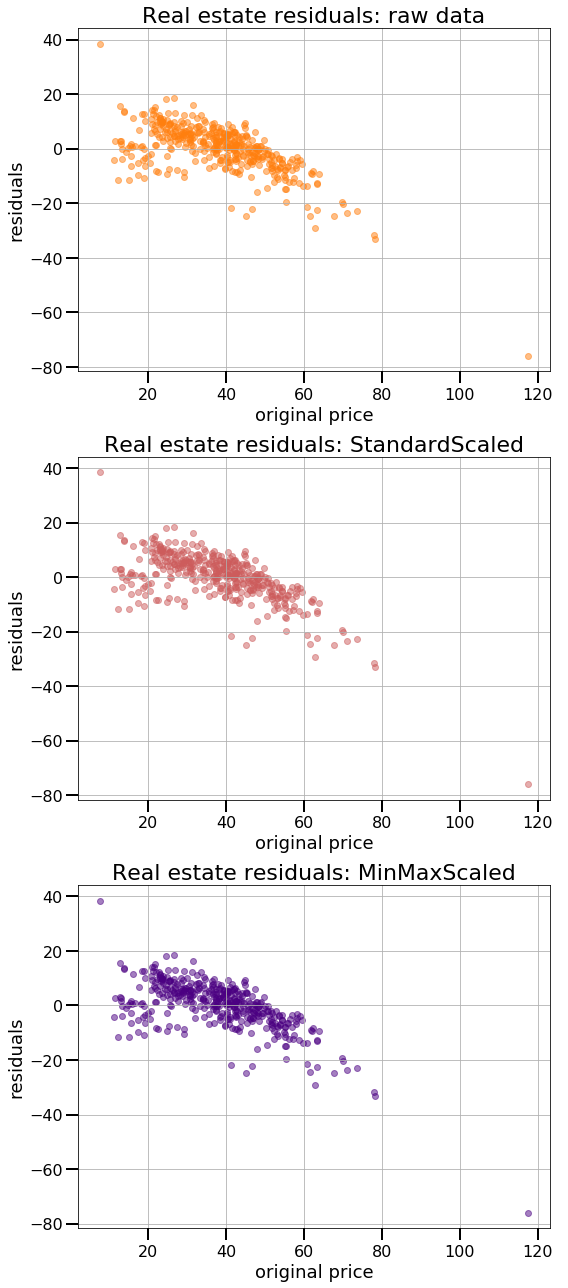

In [15]:
re_linreg.fit(x,y)
plt.figure(figsize=[8,18])
plt.subplot(311)
y_pred3 = re_linreg.predict(x)
residuals3 = y_pred3 - y
plt.scatter(y,residuals3,alpha="0.5",color="tab:orange")
plt.grid()
plt.title("Real estate residuals: raw data",size=22)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params("both",length=12,width=2)
plt.tick_params("both",which="minor",length=8,width=2)
plt.xlabel("original price",size=18)
plt.ylabel("residuals",size=18)

plt.subplot(312)

re_linreg.fit(x_std,y)
y_pred4 = re_linreg.predict(x_std)
residuals4 = y_pred4 - y
plt.scatter(y,residuals4,alpha="0.5",color="indianred")
plt.grid()
plt.title("Real estate residuals: StandardScaled",size=22)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params("both",length=12,width=2)
plt.tick_params("both",which="minor",length=8,width=2)
plt.xlabel("original price",size=18)
plt.ylabel("residuals",size=18)

plt.subplot(313)
re_linreg.fit(x_mm,y)
y_pred5 = re_linreg.predict(x_mm)
residuals5 = y_pred5 - y
plt.scatter(y,residuals5,alpha="0.5",color="indigo")
plt.title("Real estate residuals: MinMaxScaled",size=22)
plt.grid()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params("both",length=12,width=2)
plt.tick_params("both",which="minor",length=8,width=2)
plt.xlabel("original price",size=18)
plt.ylabel("residuals",size=18)

plt.tight_layout()

It seems like that fitting on the normalized data gives no advantage from the perspecive of residuals.
We can see a trend here: our model overestimates the houses with smaller prices, and underestimates those which are more expensive. The region where our estimates seems to be correct within some error is in of 40 price per unit area.

If I had to pick which house to buy, I would go with the one with the minimum of the original price, the reason being it costs much less, than we've predicted it. So that means, that the market would value it more than it's current price.